In [1]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('precision', 2)

In [2]:
data = pd.read_csv('../data/processed/data.csv',parse_dates=['date'], index_col=[0])
data.head(1)

,date,hour,season,year,month,holiday,dow,workingday,weather_condition,casual,registered,cnt,temp,atemp,humidity,windspeed,nCnt,nCasual,nRegistered
1,2011-01-01,1,1,2011,1,0,6,0,1,8,32,40,0.22,0.27,0.8,0.0,0.02,0.02,0.05


# 2. Is there a difference in usage between a casual and a registered user? (Are they statistically different?)

The figure below shows a comparisson of the distributions of the number of bikes in use by registered vs casual users in function the time of day and whether it's a holiday/weekend or just a normal weekday. 

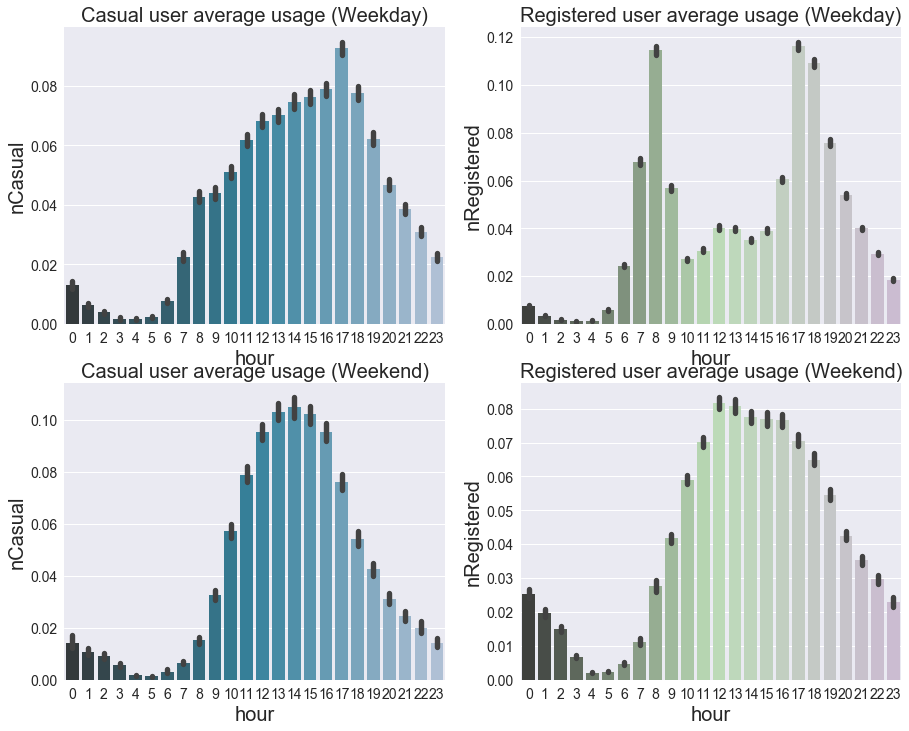

In [29]:
count_per_hr = weekday.loc[:,['hour','nCasual','nRegistered']]

fig = plt.figure(figsize=(15,12))
axes1 = fig.add_subplot(2,2,1)
sns.barplot(x="hour", y="nCasual", data=count_per_hr, palette="PuBuGn_d").set_title('Casual user average usage (Weekday)')

axes2 = fig.add_subplot(2,2,2)
sns.barplot(x="hour", y="nRegistered", data=count_per_hr, palette="PRGn_d").set_title('Registered user average usage (Weekday)')

count_per_hr = weekend.loc[:,['hour','nCasual','nRegistered']]

axes3 = fig.add_subplot(2,2,3)
sns.barplot(x="hour", y="nCasual", data=count_per_hr, palette="PuBuGn_d").set_title('Casual user average usage (Weekend)')

axes4 = fig.add_subplot(2,2,4)
sns.barplot(x="hour", y="nRegistered", data=count_per_hr, palette="PRGn_d").set_title('Registered user average usage (Weekend)')

plt.show()

Figures 1, 3 and 4 are show a similar usage. Figure 1 shows the average usage for the casual user on a weekday peaking at 5pm, where figure 3 shows the casual user on a weekend having a high demand in the afternoon and figure 4 are the registered users on a weekend also demanding high volumes of bikes starting at noon and carrying on in throughout the rest of the evening. 

It's important to consider that in the distribution of the demand's mean in weekdays graph, the influence of the casual users was not big enough to modify the shape of the distribution because the user type ratio is slightly higher than 6:1. 

We can notice that registered users are more intense over the weekends starting to bike earlier than their fellow casual users. So it is interesting to see if these 2 proportions are different from one each other in terms of bike usage. For that another 2 sample t-test will answer our question.  

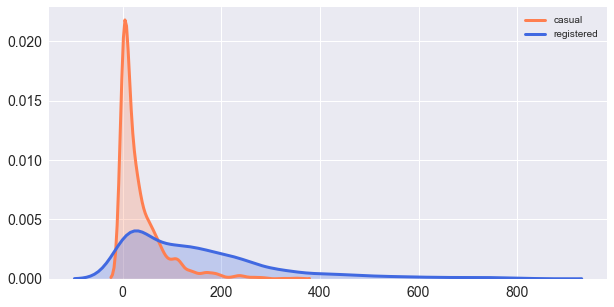

Ttest_indResult(statistic=-30.62832750204818, pvalue=1.0765742510919931e-170)

In [30]:
# Generate samples of 10% of the dataset's size of casual users and registered ones. 
sample_size = int(len(data)*0.1) # 10% of population count
random_index = random.sample(range(len(data)), sample_size)
sample_casual = data.loc[random_index,'casual']
random_index = random.sample(range(len(data)), sample_size)
sample_registered = data.loc[random_index,'registered']

# 2 sample t-test
p1=sns.kdeplot(sample_casual, shade=True, color="coral")
p2=sns.kdeplot(sample_registered, shade=True, color="royalblue")
plt.show()
stats.ttest_ind(a= sample_casual,
                b= sample_registered,
                equal_var=False) 

The p-value is so small that the null hypothesis can be rejected and thus both groups are not identical but statistically different. 